Epoch 1/1000


c:\Users\47958\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 - 0s - 30ms/step - accuracy: 0.9231 - loss: 0.1839
Epoch 2/1000
15/15 - 0s - 3ms/step - accuracy: 0.9692 - loss: 0.0823
Epoch 3/1000
15/15 - 0s - 3ms/step - accuracy: 0.9736 - loss: 0.1142
Epoch 4/1000
15/15 - 0s - 3ms/step - accuracy: 0.9802 - loss: 0.0728
Epoch 5/1000
15/15 - 0s - 3ms/step - accuracy: 0.9824 - loss: 0.0545
Epoch 6/1000
15/15 - 0s - 3ms/step - accuracy: 0.9890 - loss: 0.0336
Epoch 7/1000
15/15 - 0s - 3ms/step - accuracy: 0.9868 - loss: 0.0368
Epoch 8/1000
15/15 - 0s - 2ms/step - accuracy: 0.9890 - loss: 0.0374
Epoch 9/1000
15/15 - 0s - 2ms/step - accuracy: 0.9868 - loss: 0.0315
Epoch 10/1000
15/15 - 0s - 3ms/step - accuracy: 0.9890 - loss: 0.0290
Epoch 11/1000
15/15 - 0s - 2ms/step - accuracy: 0.9890 - loss: 0.0235
Epoch 12/1000
15/15 - 0s - 3ms/step - accuracy: 0.9890 - loss: 0.0233
Epoch 13/1000
15/15 - 0s - 2ms/step - accuracy: 0.9802 - loss: 0.0554
Epoch 14/1000
15/15 - 0s - 2ms/step - accuracy: 0.9824 - loss: 0.0345
Epoch 15/1000
15/15 - 0s - 2ms/step - acc

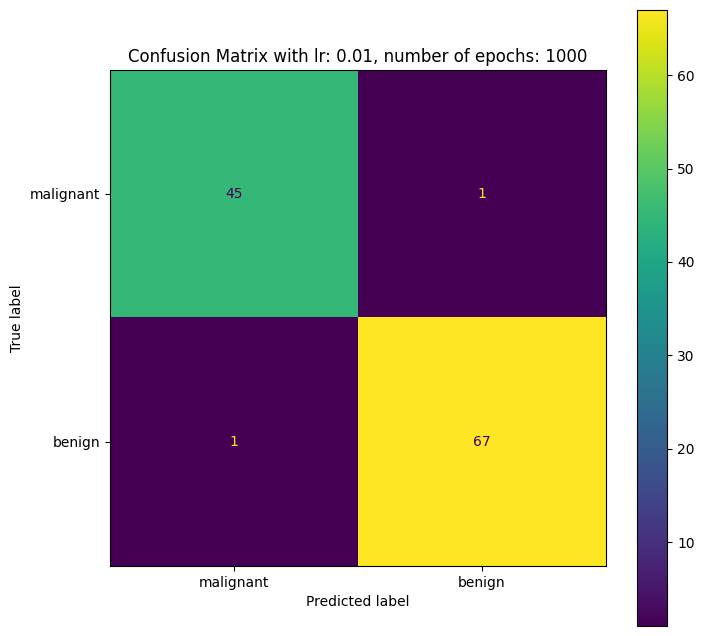

In [13]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Set a random seed for reproducibility
np.random.seed(666)

# Load and preprocess the Wisconsin Breast Cancer dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)


model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))  
model.add(Dense(1, activation='sigmoid'))  

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=2)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int).flatten()  

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=data.target_names)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax)

""""
labels = data.target_names[:conf_matrix.shape[0]]
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
"""
plt.title(f"Confusion Matrix with lr: 0.01, number of epochs: 1000")
plt.show()
